# Bellabeat Capstone Project

# <h2>1. Summary</h2>

Bellabeat is a small company that manufactures high-tech, health-focused products for women, and though successful, they have the potential to become a larger player in the global smart device market. In this case study, data from Fitbit users is **analysed using R** to provide insights into usage behaviour, and user and health profiles for wearable technology. These data-driven insights are then used to derive potential implementations for the consideration of the Bellabeat marketing team and executive committee that can guide their marketing strategy. Through data analysis, these recommendations will have basis grounded in the numbers and statistics of potential customers to be converted. 


## 2. Business Objective (Ask)

### 2.1 Business Objective:
Present high-level recommendations that will guide Bellabeat marketing strategy, with the aim of company growth, and capturing greater market share. These recommendations will be based on prescriptive analysis on user data to find current trends for usage of wearable technology.

### 2.2 Key Stakeholders:
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
2. Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
3. Bellabeat marketing analytics team

## 3. Prepare

### 3.1 Dataset information:
Dataset used: **FitBit Fitness Tracker Data**
<br>
Summary of dataset: 
* Sample size: 33 Fitbit users
* Date recorded: 12 April 2016 - 12 May 2016 (1 month)
* Date available: Published in 2021
* Data content: Health metrics recorded by users' Fitbit devices, including activity, steps, calories, sleep, weight, etc.


### 3.2 ROCCC:

* Reliability: If the data were able to be verified, it would be reasonably reliable, as it contains factual data that FitBit devices recorded directly from their users. However, there is no way to verify the data. Additionally, there is no way to ascertain how the dataset was sampled, and thus, whether it is representative or not. **This is particularly pertinent as Bellabeat products target women almost exclusively.**

* Originality: Not an original dataset as it is third-party data collected via Amazon Mechanical Turk, and by an unknown entity, and so it is impossible to validate the data with the original source.

* Comprehensiveness: Though the data is comprehensive, with various health metric data like steps, calories burned, activity minutes, sleep, and weight, at daily, hourly, and down to minute level, it lacks crucial demographic data, such as age and gender of each user.

* Current: This data was collected in 2016, making it outdated, and user trends and behaviours may have shifted away. Additionally Fitbit itself have updated the way they track active minutes, and other features to their devices.

* Cited: No information on who was the original collector of the data, or for what purpose.

### 3.3 Conclusion on dataset: 

As such, the relevance and credibility of the data is questionable, and in actual practice, analysis of this data should only be used to skim overarching trends, or to guide analysts towards which types of data/relationships might be best to focus on, once better datasets are available.  

These datasets might include Bellabeat's first-party data on their own users, creating first-party surveys, or more current second or third-party data from market leaders such as Apple or Samsung.

While these limitations are noted, for the purposes of this case study, the dataset will analysed for trends to find actionable insights, continued in the sections below.

## 4. Process

First, relevant CSVs are loaded as dataframes, and the initial process of checking the data, cleaning datatype formats, and removing duplicates is done before further data transformation and analysis.

### 4.1 Installing R Packages

In [1]:
library(tidyverse)
library(lubridate)
library(skimr)
library(janitor)
library(dplyr)
library(ggsci)
library(stats)
library(forcats)
library(scales)
list.files(path = "../input")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




[1] "fitbit"

### 4.2 Loading CSVs
Having had a cursory look at the data and metrics recorded in each CSV in the dataset using Excel, the following 3 CSVs were loaded for further analysis.
<br>
The 3 CSVs are:
* daiAct <- Contains all activity data in daily date format. Includes total steps, distance travelled, intensity minutes broken down into 4 categories, and calories.

* sleepDay <- Includes date of log, total minutes asleep, and total time in bed. 

* weight <- Weight logs, including datetime of log, weight, fat percent, BMI, manual report boolean, and log id.

The other CSVs were either not relevant, or contained the same data, broken down into different time frames (hourly, minute, etc.).

In [2]:
#Having separately glanced through each table on Excel, I filter down to the following tables for analysis
daiAct <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepDay <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Quick glance at each table again, to identify which data/columns might potentially need cleaning
head(daiAct)
head(sleepDay)
head(weight)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


### 4.3 Cleaning up date, time, and Id formats

In [4]:
#Cleaning up date and time formats, and creating additional columns for the hourly data to split date and time
daiAct$ActivityDate = as.Date(daiAct$ActivityDate, format = "%m/%d/%Y")

sleepDay$SleepDay = as.Date(sleepDay$SleepDay, format = "%m/%d/%Y")

weight$Date = as.POSIXct(weight$Date, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
weight$date = as.Date(weight$Date, format = "%m/%d/%y")

In [5]:
#Changing "Id" format into characters
daiAct <- daiAct %>% 
  mutate(Id = as.character(Id))

sleepDay <- sleepDay %>% 
  mutate(Id = as.character(Id))

weight <- weight %>% 
  mutate(Id = as.character(Id))

In [6]:
#Checking again to see if all have been formatted properly now
head(daiAct)
head(sleepDay)
head(weight)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<chr>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,date
,<chr>,<dttm>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<date>
1,1503960366,2016-05-02 23:59:59,52.6,115.9631,22,22.65,True,1.462234e+12,2016-05-02
2,1503960366,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,True,1.462320e+12,2016-05-03
3,1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,False,1.460510e+12,2016-04-13
4,2873212765,2016-04-21 23:59:59,56.7,125.0021,NA,21.45,True,1.461283e+12,2016-04-21
5,2873212765,2016-05-12 23:59:59,57.3,126.3249,NA,21.69,True,1.463098e+12,2016-05-12
6,4319703577,2016-04-17 23:59:59,72.4,159.6147,25,27.45,True,1.460938e+12,2016-04-17


### 4.4 Removing duplicates

In [7]:
#Checking each set for the number of users who made a log - At first glance, we can see that fewer users logged sleep and weight
n_unique(daiAct$Id)
n_unique(sleepDay$Id)
n_unique(weight$Id)

[1] 33

[1] 24

[1] 8

In [8]:
#Checking for duplicates
sum(duplicated(daiAct))
sum(duplicated(sleepDay))
sum(duplicated(weight))

[1] 0

[1] 3

[1] 0

In [9]:
#Selecting only distinct records to remove duplicates
sleepDay <- sleepDay %>%
  distinct()

sum(duplicated(sleepDay))

[1] 0

The data has now had column data types altered, and duplicates removed, for further cleaning / transformation.

### 4.5 Identifying inapplicable rows
Closer inspection of the daiAct dataframe reveals that there are rows where users record no steps, or activities, and it is likely that the users did not wear their device on that day, but the data was only logged due to a preset of calories burnt per day.
<br>

In order to identify these rows, we filter out rows where there are fewer than 20 steps recorded in the day, in order to account for scenarios where the user may have shifted the unworn device, causing a few steps to be registered.

In [10]:
nrow(daiAct[daiAct$TotalSteps < 20, ])
nrow(daiAct[daiAct$TotalSteps == 0, ]) 
nrow(daiAct[daiAct$Calories == 0, ])

head((subset(daiAct, daiAct$TotalSteps == 0)))
head((subset(daiAct, daiAct$TotalSteps > 1 & daiAct$TotalSteps < 20)))

#Interesting to note that, although there are 77 logs where 0 steps were taken, only 4 rows logged 0 calories burnt. This is likely due to users
#setting basal metabolic calories burnt for each day, which automatically logs calories

[1] 82

[1] 77

[1] 4

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-05-12,0,0,0,0,0,0,0,0,0,0,0,1440,0
1844505072,2016-04-24,0,0,0,0,0,0,0,0,0,0,0,1440,1347
1844505072,2016-04-25,0,0,0,0,0,0,0,0,0,0,0,1440,1347
1844505072,2016-04-26,0,0,0,0,0,0,0,0,0,0,0,1440,1347
1844505072,2016-05-02,0,0,0,0,0,0,0,0,0,0,0,1440,1348
1844505072,2016-05-07,0,0,0,0,0,0,0,0,0,0,0,1440,1347


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1844505072,2016-04-20,8,0.01,0.01,0,0,0,0.01,0,0,0,1,1439,1349
1844505072,2016-04-27,4,0.00,0.00,0,0,0,0.00,0,0,0,1,1439,1348
4020332650,2016-04-17,16,0.01,0.01,0,0,0,0.01,0,0,0,2,1438,1990
4319703577,2016-05-12,17,0.01,0.01,0,0,0,0.01,0,0,0,2,0,257
6775888955,2016-05-03,9,0.01,0.01,0,0,0,0.01,0,0,0,1,1439,1843


## 5. Analyse
In order to analyse the dataset for trends and patterns that would help drive actionable recommendations for a marketing strategy, the focus will **primarily** be on **usage behaviour**, **usage correlations**, and secondarily be on user **health metrics**. 

### 5.1 Usage behaviour
Primary focus is on usage behaviour and usage correlations trends, as this can inform which features users value more and which ones users value less in their Fitbit devices. This can inform product/R&D strategy, and marketing strategy.


#### 5.1.1 How often did users wear their device

In section 4.6, it was identified that 87 rows were essentially null data, and to see how often users actually wore their device, these rows must be filtered out.

We first assign "unworn" to rows where there are not at least 20 steps recorded, and "worn" for rows where there are at least 20 steps.

In [11]:
#First, in a new column, we assign "unworn" for rows where fewer than 20 steps were recorded, and "worn"
#Processing dailyActivity logs based on TotalStep to filter out records where the tracker was not worn (essentially null records)
#and also to filter based on activity level as prescribed by pubmed article
daiAct <- daiAct %>%
  mutate(usageLevel = case_when(
    daiAct$TotalSteps < 20 ~ "unworn",
    daiAct$TotalSteps >= 20 ~ "worn",
  ))
head(daiAct)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,usageLevel
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,worn
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,worn
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,worn
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,worn
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,worn
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,worn


In [12]:
#Then we can count how many rows where users registered at least 20 steps, as a proxy for how many times/days they actually wore their device.

daysWorn <- daiAct %>%
group_by(Id) %>%
summarize(count = sum(usageLevel == "worn"))

colnames(daysWorn)[2] ="daysCount"

head(daysWorn)

Id,daysCount
<chr>,<int>
1503960366,30
1624580081,31
1644430081,30
1844505072,19
1927972279,17
2022484408,31


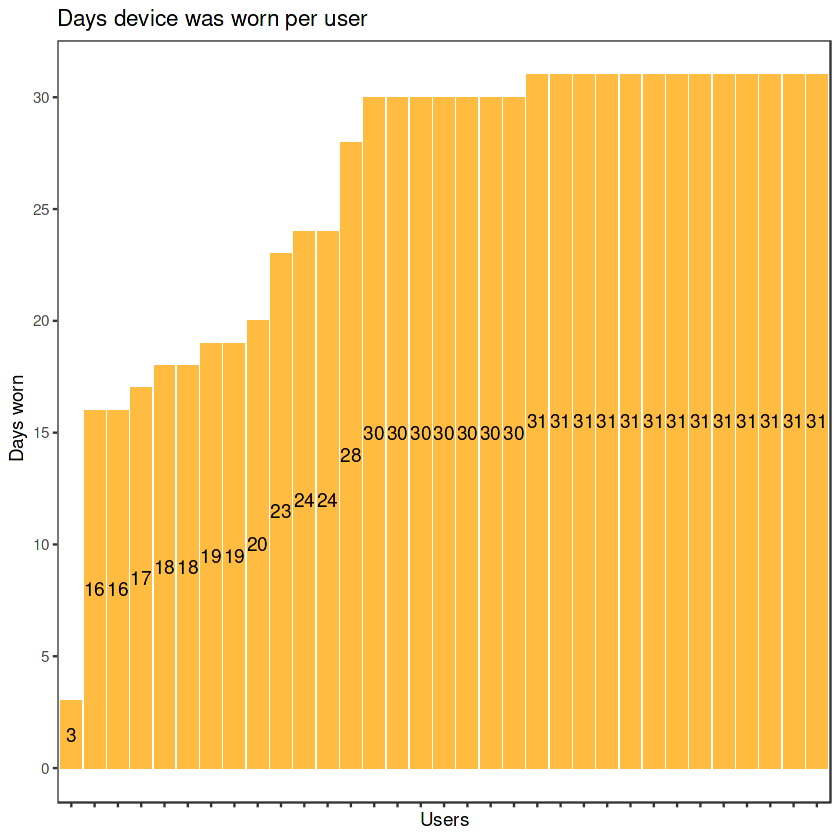

In [13]:
#We can then visualise this through a bar chart.

daysWorn$Id <- factor(daysWorn$Id, levels = daysWorn$Id[order(daysWorn$daysCount)])

ggplot(daysWorn, aes(x=Id, y=daysCount)) +
  scale_y_continuous(breaks= pretty_breaks())+
  geom_bar(fill = "orange", stat="identity", alpha = 0.75) +
  theme_bw()+
  theme(panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
       axis.text.x = element_blank())+
  geom_text(aes(label = daysCount), position = position_stack(vjust = 0.5)) +
  labs(title = "Days device was worn per user", x = "Users", y = " Days worn")

At a glance, we can see that most users used their devices consistently.

##### 5.1.1.1 Breakdown of users by usage frequency
We can assign each user a frequency rating based on number of days worn. If they did not wear it for at least 50% of the time, they are low frequency, moderate frequency between 50% and 80% of the time, and high frequency if they wear their device at least 80% of the time.


In [14]:
daysWornFreq <- daysWorn %>%
  mutate(wearFreq = case_when(
    daysCount < 15 ~ "low frequency",
    daysCount >= 15 & daysCount < 24 ~ "moderate frequency",
    daysCount >= 24 ~ "high frequency", 
  ))

head(daysWornFreq)

Id,daysCount,wearFreq
<fct>,<int>,<chr>
1503960366,30,high frequency
1624580081,31,high frequency
1644430081,30,high frequency
1844505072,19,moderate frequency
1927972279,17,moderate frequency
2022484408,31,high frequency


In [15]:
#Aggregating the users based on usage frequency
aggWornFreq <- daysWornFreq %>% group_by(wearFreq) %>% 
  summarise(total_count=n(),
            .groups = 'drop')

aggWornFreq

wearFreq,total_count
<chr>,<int>
high frequency,23
low frequency,1
moderate frequency,9


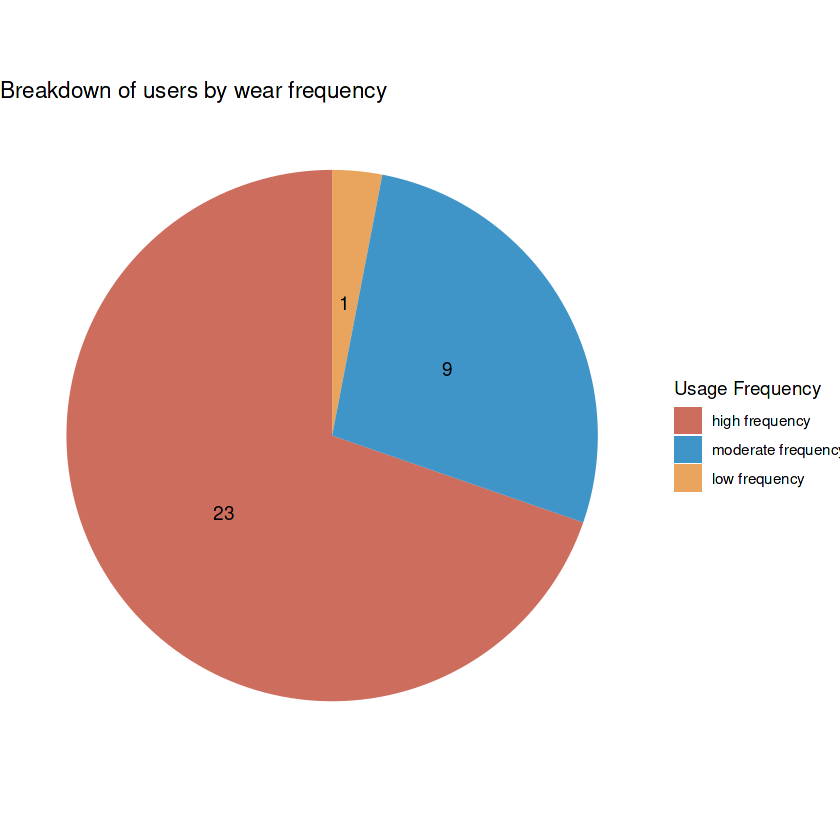

In [16]:
aggWornFreq$wearFreq <- factor(aggWornFreq$wearFreq, levels = c("high frequency", "moderate frequency", "low frequency"))

ggplot(aggWornFreq, aes(x="", y=total_count, fill=wearFreq)) +
  geom_bar(stat="identity", width=1, alpha = 0.75) +
  coord_polar(theta = "y") +
  theme_void() +
 scale_fill_nejm(name = "Usage Frequency") +
  geom_text(aes(label = total_count), position = position_stack(vjust = 0.5)) +
  labs(title = "Breakdown of users by wear frequency")

Here we can see that 23 users are high frequency users, 9 are moderate frequency users, and 1 user is a low frequency user.
If it were verifiable that the sample and sampling techniques were representative, this statistic could be a **predictor of the breakdown of the usage frequency of the whole population** of fitness device wearers.

**Recommendation**: Based on this breakdown of usage frequency, as well as other findings in this case study, a follow up survey should be conducted to ask people who use fitness devices how often they use their device, and reasons for doing so (e.g. high frequency because they like to track every step; moderate frequency because they only wear it when they exercise; low frequency because it's like a watch to them, they only wear it on weekends).

##### 5.1.1.2 Days the device is not worn by day of week
We can also explore if there is a trend for when users do not wear their device on certain days. For example, if users don't wear their device on weekends because they are relaxing or going out, or perhaps they don't wear it on weekdays, because they go to work and do not do much physical activity.


In [17]:
#We must first insert rows for each user, for each date where a record does not exist, which count as a non-wear day
max(daiAct$ActivityDate)
min(daiAct$ActivityDate)
start_date <- as.Date("2016-04-12")
end_date <- as.Date("2016-05-12")
id_numbers <- unique(daiAct$Id)

[1] "2016-05-12"

[1] "2016-04-12"

In [18]:
proxyDates <- expand.grid(Id = id_numbers, ActivityDate = seq(from = start_date, to = end_date, by = "day"))

proxyExisting <- merge(daiAct, proxyDates, by = c("Id", "ActivityDate"), all = FALSE)

new_rows <- anti_join(proxyDates, proxyExisting, by = c("Id", "ActivityDate"))

new_rows$TotalSteps <- rep(0, nrow(new_rows))

daiActProxy <- daiAct[, -c(4:16)]

daiActPlus <- rbind(daiActProxy, new_rows)

nrow(daiActPlus) #This should be 33 users x 31 days giving 1023 to be accurate

[1] 1023

In [19]:
daiActPlus$DayOfWeek <- weekdays(daiActPlus$ActivityDate)
daysNotWorn <- subset(daiActPlus, TotalSteps <= 20)


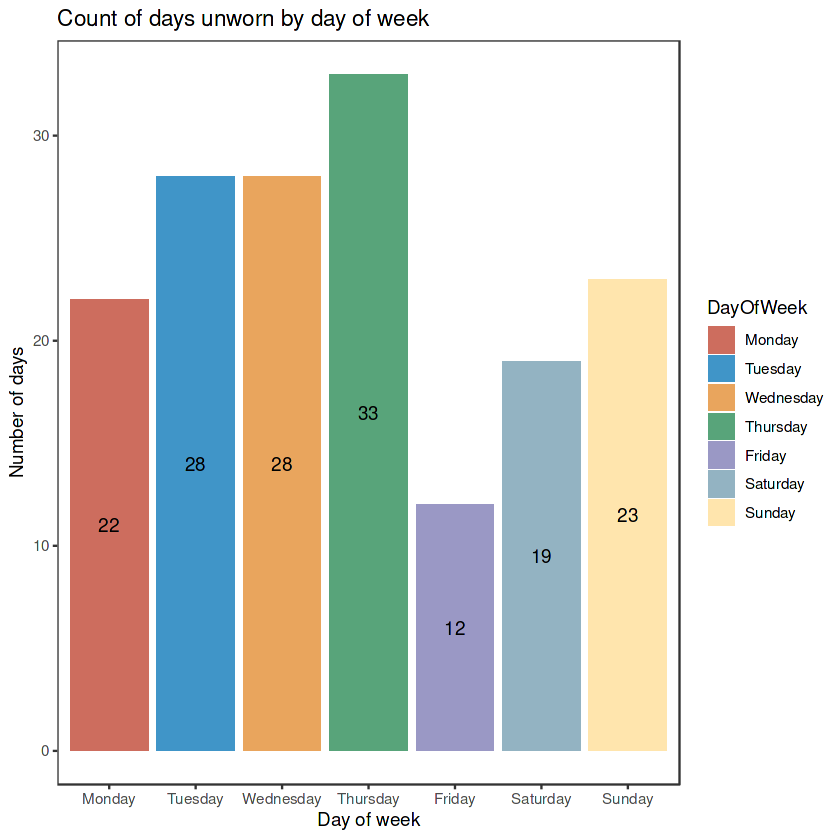

In [20]:
daysNotWornCount <- daysNotWorn %>%
group_by(DayOfWeek) %>%
summarize(DayCount = n())

daysNotWornCount$DayOfWeek <- factor(daysNotWornCount$DayOfWeek, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"))

ggplot(daysNotWornCount, aes(x=DayOfWeek, y=DayCount, fill = DayOfWeek)) +
  scale_y_continuous(breaks= pretty_breaks())+
  geom_bar(stat="identity", alpha = 0.75) +
  scale_fill_nejm()+
  theme_bw()+
  theme(panel.grid.major = element_blank(),
    panel.grid.minor = element_blank())+
  geom_text(aes(label = DayCount), position = position_stack(vjust = 0.5)) +
  labs(title = "Count of days unworn by day of week", x = "Day of week", y = "Number of days")

#Interesting to note that Friday is the day with the fewest counts not worn - look at if activity matches this

We see that with the exception of Monday, **users tend to wear their devices less on weekdays, and more on weekends, particularly Friday**, which has the lowest count of non-wear, by quite a margin.
<br>

This could be for various reasons; perhaps users prefer to use their device purely to track exercise activities, which they are more likely to do on weekends, or perhaps users do not wear their device in more formal settings in the office, or perhaps users just don't care to track health data while busy. **The findings for this would be of importance for Bellabeat to know, as one of the selling points of their Leaf device is that it blends in to more formal or stylish settings, mimicking jewellery, rather than a sports device.**
<br>

In order to ascertain the true reasons for this, it would have been good to send the users in the dataset a follow-up survey, but since this is not possible, a similar survey can be sent to a well-sample, representative group, to ask about when they are most likely to wear or not wear their device, and the reasons for that.

### 5.1.2 Usage of sleep tracking function

In [21]:
sleepLogs <- aggregate(sleepDay$Id, by = list(sleepDay$Id), FUN = length)
colnames(sleepLogs)[1] ="Id"
colnames(sleepLogs)[2] ="sleepLogCount"

sleepLogs

Id,sleepLogCount
<chr>,<int>
1503960366,25
1644430081,4
1844505072,3
1927972279,5
2026352035,28
2320127002,1
2347167796,15
3977333714,28
4020332650,8


In [22]:
wornAndSleep <- merge(x=daysWornFreq,y=sleepLogs, 
             by="Id", all=TRUE)

#We can assign 0 value to all NA in wornAndSleep, because it just means that user didn't log sleep at all

wornAndSleep <- replace(wornAndSleep, is.na(wornAndSleep), 0)

head(wornAndSleep)


,Id,daysCount,wearFreq,sleepLogCount
,<fct>,<int>,<chr>,<dbl>
1,4057192912,3,low frequency,0
2,4020332650,16,moderate frequency,8
3,6775888955,16,moderate frequency,3
4,1927972279,17,moderate frequency,5
5,2347167796,18,moderate frequency,15
6,8253242879,18,moderate frequency,0


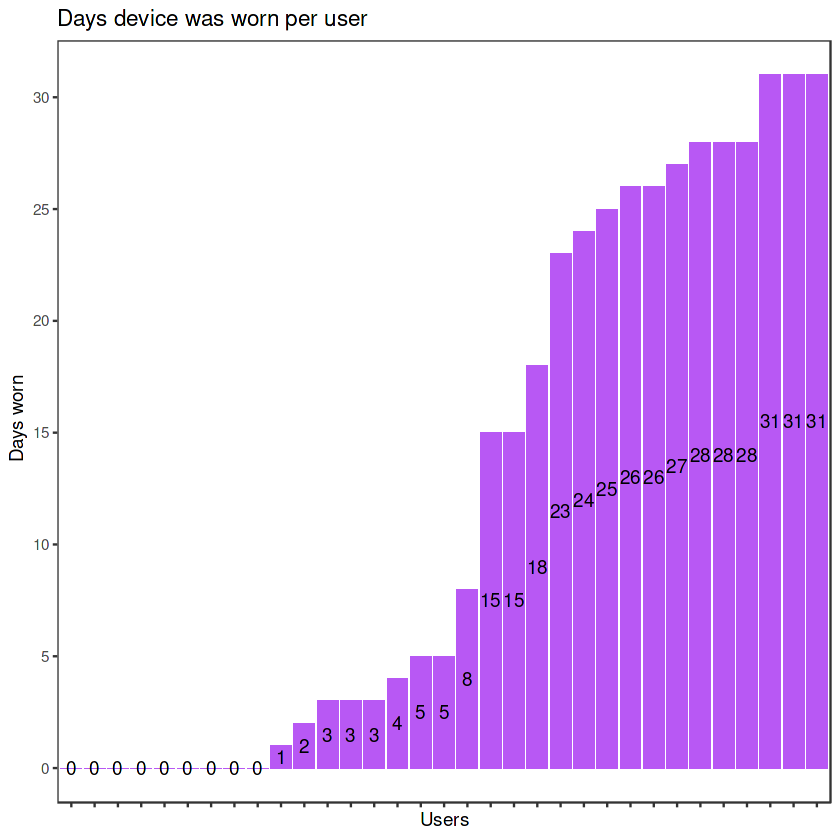

In [23]:
wornAndSleep$Id <- factor(wornAndSleep$Id, levels = wornAndSleep$Id[order(wornAndSleep$sleepLogCount)])

ggplot(wornAndSleep, aes(x=Id, y=sleepLogCount)) +
  scale_y_continuous(breaks= pretty_breaks())+
  geom_bar(fill = "purple", stat="identity", alpha = 0.75) +
  theme_bw()+
  theme(panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
       axis.text.x = element_blank())+
  geom_text(aes(label = sleepLogCount), position = position_stack(vjust = 0.5)) +
  labs(title = "Days device was worn per user", x = "Users", y = " Days worn")

At a glance, we can see that far fewer users used the sleep logging function as frequently, and half barely used the feature.

In [24]:
wornAndSleep <- wornAndSleep %>%
  mutate(sleepUseFreq = case_when(
    sleepLogCount == 0 ~ "non-user",
    sleepLogCount > 0 & sleepLogCount < 15 ~ "low frequency",
    sleepLogCount >= 15 & sleepLogCount < 24 ~ "moderate frequency",
    sleepLogCount >= 24 ~ "high frequency", 
  ))

head(wornAndSleep)

,Id,daysCount,wearFreq,sleepLogCount,sleepUseFreq
,<fct>,<int>,<chr>,<dbl>,<chr>
1,4057192912,3,low frequency,0,non-user
2,4020332650,16,moderate frequency,8,low frequency
3,6775888955,16,moderate frequency,3,low frequency
4,1927972279,17,moderate frequency,5,low frequency
5,2347167796,18,moderate frequency,15,moderate frequency
6,8253242879,18,moderate frequency,0,non-user


In [25]:
aggwornAndSleep <- wornAndSleep %>% group_by(sleepUseFreq) %>% 
  summarise(total_count=n(),
            .groups = 'drop')

aggwornAndSleep

sleepUseFreq,total_count
<chr>,<int>
high frequency,11
low frequency,9
moderate frequency,4
non-user,9


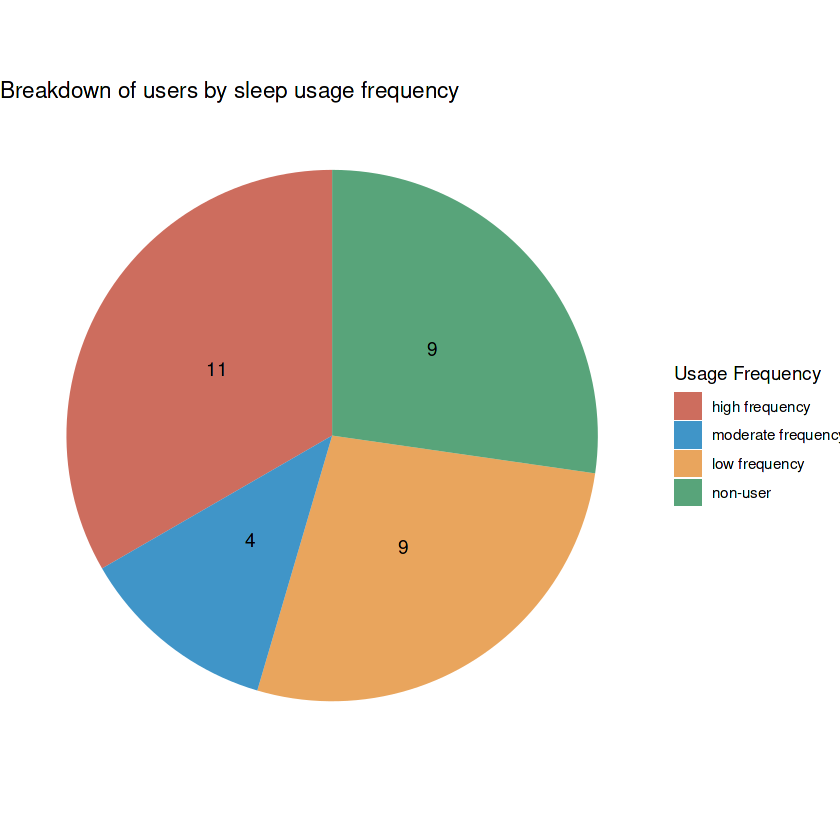

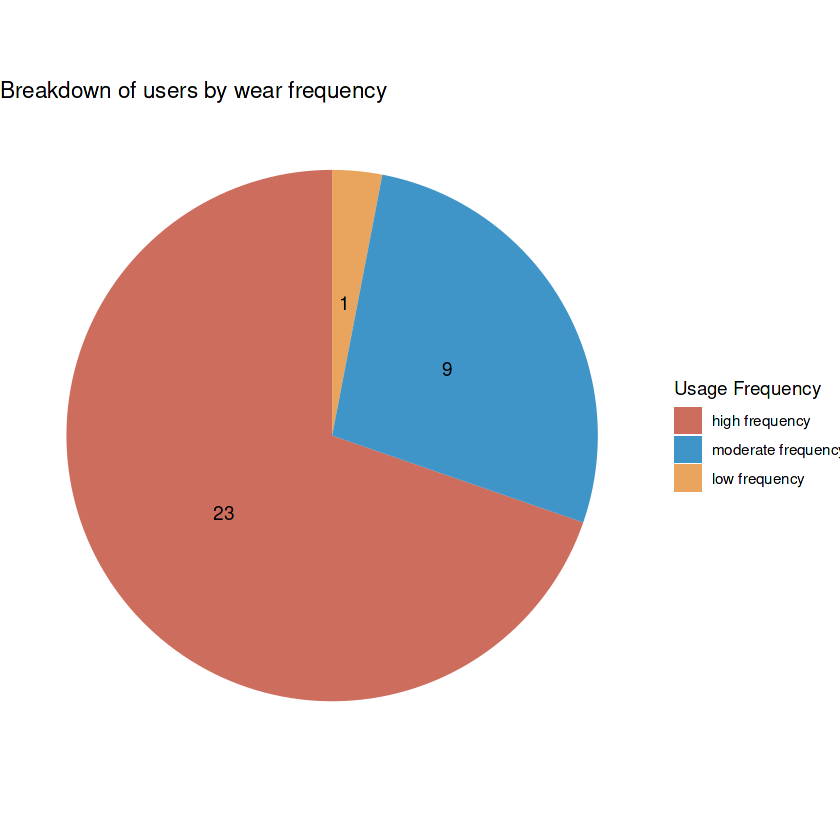

In [26]:
aggwornAndSleep$sleepUseFreq <- factor(aggwornAndSleep$sleepUseFreq, levels = c("high frequency", "moderate frequency", "low frequency", "non-user"))

ggplot(aggwornAndSleep, aes(x="", y=total_count, fill=sleepUseFreq)) +
  geom_bar(stat="identity", width=1, alpha = 0.75) +
  coord_polar(theta = "y") +
  theme_void() +
 scale_fill_nejm(name = "Usage Frequency") +
  geom_text(aes(label = total_count), position = position_stack(vjust = 0.5)) +
  labs(title = "Breakdown of users by sleep usage frequency")

ggplot(aggWornFreq, aes(x="", y=total_count, fill=wearFreq)) +
  geom_bar(stat="identity", width=1, alpha = 0.75) +
  coord_polar(theta = "y") +
  theme_void() +
 scale_fill_nejm(name = "Usage Frequency") +
  geom_text(aes(label = total_count), position = position_stack(vjust = 0.5)) +
  labs(title = "Breakdown of users by wear frequency")

We can see that when comparing breakdown of sleep function usage to wearing the device, far fewer users used the sleep tracking function consistently, and quite a few did not use it at all.

Only 15 participants, less than half of the 33 use the sleep tracker with regularity, while 18 users did not use it frequently, with 9 not using it at all.

This finding **indicates that the sleep function is not highly valued by Fitbit users**, and finding out the reasons for this can be useful for product/marketing strategy.

Potential reasons might be:
1. User do not feel the need to track sleep (Sleep function not valued at all)
2. Wearing the device while sleeping is uncomfortable
3. Users feel that existing sleep tracking technology is inaccurate or not useful


**Recommendation**: The best way to find out the true reasons is to survey users, and the following questions can be asked to narrow down whether or not sleep tracking function is valued/prioritised, and the reasons for that.

Do you currently own a wearable device?
If yes - Do you regularly track your sleep through a wearable device?
If no - What are some reasons for choosing not to track your sleep with your device?
How important is the sleep tracker for you in a wearable device?


#### 5.1.2.1 Correlation between frequency of wear, and frequency of sleep tracking (k-means clustering)
To attempt to narrow down why users do not track their sleep, we see if there is a correlation between how often users wear their device, and how often they track their sleep.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 5 rows containing missing values (`geom_smooth()`).”


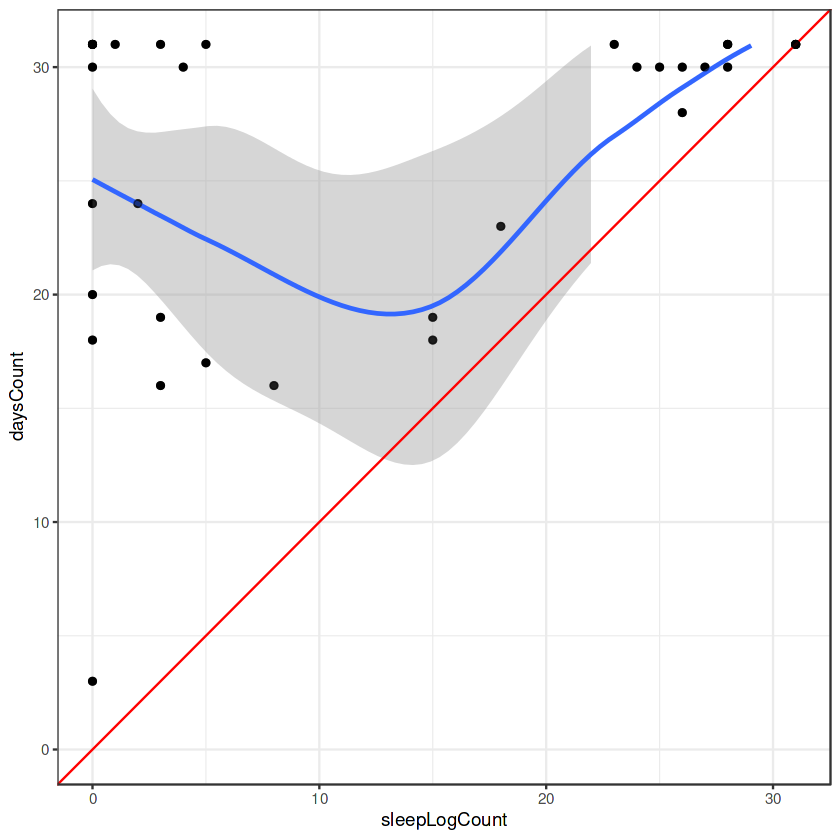

In [27]:
#Filtering out the non-user before plotting to see relationship between how often users use activity tracking vs how often they use sleep tracking
wornAndSleep %>% ggplot(aes(x=sleepLogCount, y=daysCount)) + geom_point() + geom_smooth()+
geom_abline(slope = 1, intercept = 0, color = "red")+
  theme_bw()+
  ylim(0, max(wornAndSleep$daysCount))+
  xlim(0, max(wornAndSleep$sleepLogCount))+
  geom_point(alpha = 0.5)

Through this scatterplot, we can see that there is not a clear relationship between wearing the device, and tracking sleep. However, bearing in mind that by tracking their sleep, users automatically have a count towards wearing the device, **it simply means that not all users track their sleep every day that they wear their device**.

We can see however, that clusters seems to appear within the scatterpoints, and so we can try K-means clustering to find further insights.

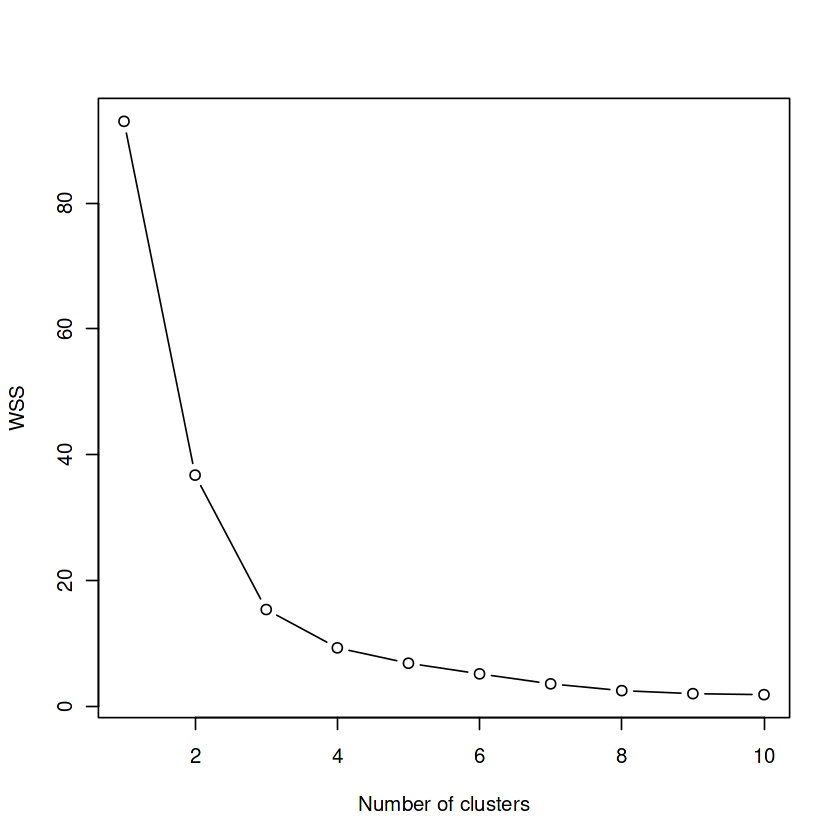

In [28]:
wornAndSleepKMeans <- select(wornAndSleep, -3, -5)
wornAndSleepKMeans <- as.data.frame(lapply(wornAndSleepKMeans, as.double))

wss <- c()
for (i in 1:10) {
  kmeans_fit <- kmeans(scale(filter(wornAndSleepKMeans,daysCount > 10)), centers = i, nstart = 25)
  wss[i] <- kmeans_fit$tot.withinss
}

plot(1:10, wss, type = "b", xlab = "Number of clusters", ylab = "WSS")

Elbow method shows 3 centres is optimal

In [29]:
kmeans_fit <- kmeans((scale(filter(wornAndSleepKMeans,daysCount > 10))), centers = 3, nstart = 25)
kmeans_fit$cluster

[1] 2 2 2 2 2 2 2 2 2 1 1 3 3 1 3 3 3 3 1 1 1 3 1 1 3 3 1 3 3 1 3 1

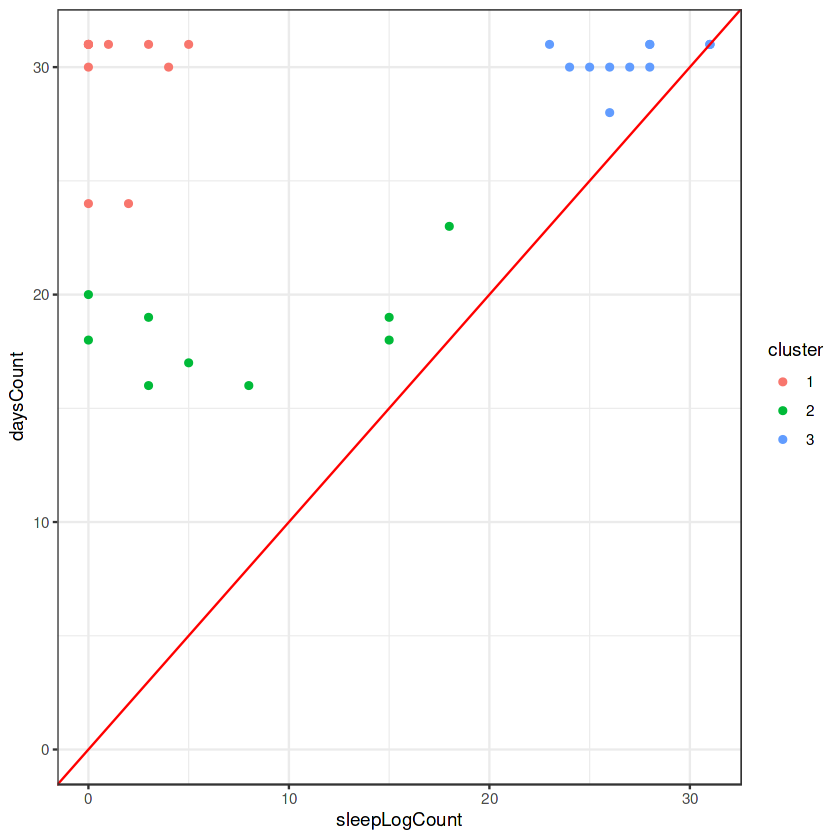

In [30]:
wornAndSleep2 <- filter(wornAndSleep, daysCount > 10)
wornAndSleep2$cluster <- as.factor(kmeans_fit$cluster)

ggplot(wornAndSleep2, aes(x = sleepLogCount, y = daysCount, color = cluster)) + geom_point()+
    theme_bw()+
    ylim(0, max(wornAndSleep$daysCount))+
    xlim(0, max(wornAndSleep$sleepLogCount))+
geom_abline(slope = 1, intercept = 0, color = "red")


Based on the k-means clusters above, we see that the users fit into 3 clusters. From these 3 clusters, we can profile users based on how often they wear their device, in relation to how often they track their sleep.
    <br>
    
The 3 profiles are as follows:
* Cluster 1: Users who regularly wear their device, but do not use the sleep tracking feature
* Cluster 3: Users who regularly wear their device, AND use the sleep tracking feature regularly
* Cluster 2: Users who inconsistently wear their device and inconsistently track their sleep 

That users who wear their device almost daily fall into clusters 1 and 2 into tightly packed clusers also raises a potential finding - that users either track their sleep every day, or they do not at all, rather than tracking intermitenttly, to have a sense of their sleep data every so often. **Users either "like" the feature, or they do not.**

### 5.1.3 How often is weight functionality utilised
We examine how well utilised the weight tracking functionality is.

In [31]:
head(weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,date
,<chr>,<dttm>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<date>
1,1503960366,2016-05-02 23:59:59,52.6,115.9631,22,22.65,True,1.462234e+12,2016-05-02
2,1503960366,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,True,1.462320e+12,2016-05-03
3,1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,False,1.460510e+12,2016-04-13
4,2873212765,2016-04-21 23:59:59,56.7,125.0021,NA,21.45,True,1.461283e+12,2016-04-21
5,2873212765,2016-05-12 23:59:59,57.3,126.3249,NA,21.69,True,1.463098e+12,2016-05-12
6,4319703577,2016-04-17 23:59:59,72.4,159.6147,25,27.45,True,1.460938e+12,2016-04-17


In [32]:
weightManualCount <- weight %>%
group_by(Id,IsManualReport) %>%
summarize(ManualCount = n())
weightManualCount

weightManualCount2 <- weight %>%
group_by(IsManualReport) %>%
summarize(ManualCount = n())
weightManualCount2

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Id,IsManualReport,ManualCount
<chr>,<chr>,<int>
1503960366,True,2
1927972279,False,1
2873212765,True,2
4319703577,True,2
4558609924,True,5
5577150313,False,1
6962181067,True,30
8877689391,False,24


IsManualReport,ManualCount
<chr>,<int>
False,26
True,41


A quick look into usage of the weight measurement function shows that only 8 users logged their weights.


Of the 8 users, we see that only 2 of them measured their weights consistently.
 
 
Additionally, 3 of them have false for manual reporting, and 5 of them have true, which might refer to whether the weight measurement is logged automatically via a paired weighing scale or via Fitbit's own weighing scale offering (returning a false manual report value), or whether it was separately and manually keyed in by the user into their Fitbit device (returning a true manual report value).
 
 
The data suggests that having a paired/proprietary weighing scale does not lead users to record their weights more frequently, as 2 out of 3 of them did not log frequently, and the user who logged most consistently overall did so manually, and the number of manual entries was more than 1.5x the number of automatic entries.

**Recommendation**: Survey to find out it users value the weight tracking function, and reasons why or why not, if they would track their weight more frequently if their scale automatically syncs their information to the app.

## 5.2 Analysis of health metrics

Through health metric analysis, we might also be able to find trends and patterns amongst the users which could inform new product features or implementations, as well as to guide the marketing strategy.


### 5.2.1 Do users get enough moderate-intensity physical activity minutes each week

The American CDC recommends that "each week adults need 150 minutes of moderate-intensity physical activity".

In a medical research report by Rush University in 2019, it is highlighted that Fitbit "Very Active Minutes" and "Fairly Active Minutes" added up constitute moderate-intensity physical activity. Thus, in order to see if users are getting enough activity minutes per week, we will add up those 2 columns.

Links: https://www.cdc.gov/physicalactivity/basics/adults/index.htm#:~:text=Each%20week%20adults%20need%20150,Physical%20Activity%20Guidelines%20for%20Americans.&text=We%20know%20150%20minutes%20of,do%20it%20all%20at%20once.

https://onlinelibrary.wiley.com/doi/full/10.1002/acr2.11099

In [33]:
#Adding sum of active minutes for each day AND days of the week
daiAct$TotalActiveMinutes <- rowSums(daiAct[, 11:12])
daiAct$DayOfWeek <- weekdays(daiAct$ActivityDate)

head(daiAct)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,usageLevel,TotalActiveMinutes,DayOfWeek
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,worn,38,Tuesday
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,worn,40,Wednesday
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,worn,41,Thursday
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,worn,63,Friday
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,worn,46,Saturday
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,worn,58,Sunday


In [34]:
#To account for Fitbit employing gamification to encourage users to hit a minimum activity minutes amount per week on Monday-Sunday weeks,
# we will modify the data to create a subset of 3 Monday to Sunday weeks within the data timeframe.hg
max(daiAct$ActivityDate)-min(daiAct$ActivityDate)
daiActWeeks <- daiAct[daiAct$ActivityDate >= as.Date("2016-04-18") & daiAct$ActivityDate <= as.Date("2016-05-08"), ]
daiActWeeks$weekNumber <- as.numeric(format(daiActWeeks$ActivityDate, "%V"))

head(daiActWeeks)

Time difference of 30 days

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,usageLevel,TotalActiveMinutes,DayOfWeek,weekNumber
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1503960366,2016-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921,worn,58,Monday,16
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,worn,81,Tuesday,16
1503960366,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786,worn,40,Wednesday,16
1503960366,2016-04-21,9819,6.34,6.34,0,1.34,0.35,4.65,0,19,8,211,838,1775,worn,27,Thursday,16
1503960366,2016-04-22,12764,8.13,8.13,0,4.76,1.12,2.24,0,66,27,130,1217,1827,worn,93,Friday,16
1503960366,2016-04-23,14371,9.04,9.04,0,2.81,0.87,5.36,0,41,21,262,732,1949,worn,62,Saturday,16


#### 5.2.1.1 Average moderate-intensity physical activity minutes

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


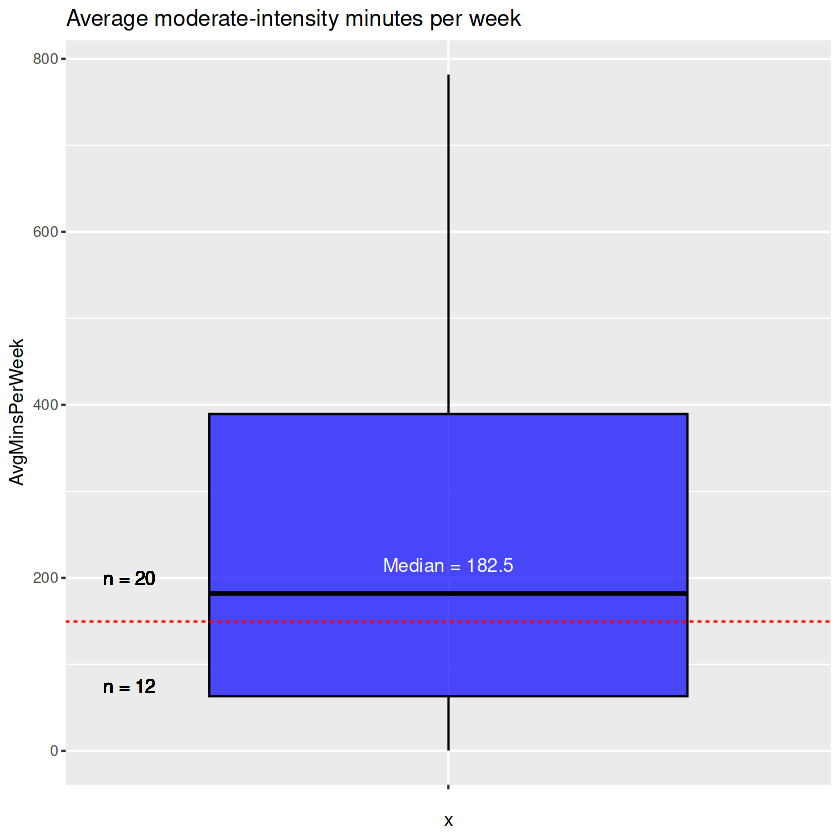

In [35]:
activeMinsPerWeek <- daiActWeeks %>%
group_by(Id, weekNumber) %>%
summarize(weekActiveMinutes = sum(TotalActiveMinutes))


userAvgWeekMins <- activeMinsPerWeek %>%
group_by(Id) %>%
summarize(AvgMinsPerWeek = mean(weekActiveMinutes))

userAvgWeekMins$Id <- factor(userAvgWeekMins$Id, levels = userAvgWeekMins$Id[order(userAvgWeekMins$AvgMinsPerWeek)])

threshold <- 150

ggplot(userAvgWeekMins, aes(x ="", y = AvgMinsPerWeek)) +
  geom_boxplot(fill = "blue", color = "black", alpha = 0.7) +
  geom_hline(yintercept = 150, linetype = "dashed", color = "red")+
  stat_summary(fun = median, geom = "text", color = "white", 
               aes(label = paste("Median =", median(AvgMinsPerWeek))), 
               vjust = -1.5)+
    geom_text(aes(label = paste0("n = ", sum(AvgMinsPerWeek < 150)), x = 0.5, y = 75))+
    geom_text(aes(label = paste0("n = ", sum(AvgMinsPerWeek > 150)), x = 0.5, y = 200))+
  ggtitle("Average moderate-intensity minutes per week")

As seen from the boxplot, though the median is 182.5, 12 users (37.5%) do not get enough moderate-intensity activity minutes per week, while 20 users (62.5%) do.

#### 5.2.1.2 Insufficient activity minutes by week count
We can then implement the week partitioning to see how many users have at least 1 week where they did not have enough moderate-intensity minutes, and further, how many are not getting enough exercise on multiple weeks.

Id,weeksInsufficient
<chr>,<int>
1624580081,2
1644430081,1
1844505072,3
1927972279,3
2026352035,3
2320127002,3


[1] 7

[1] 3

[1] 8

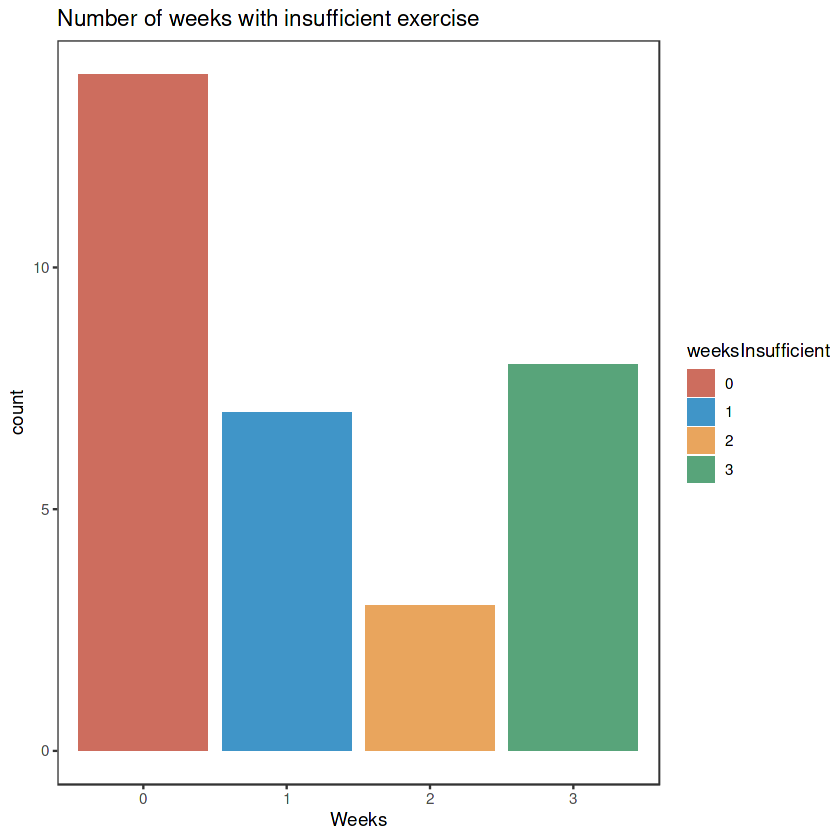

In [36]:
insufficientActivity <- filter(activeMinsPerWeek, weekActiveMinutes < 150)

countInsuffWeeks <- insufficientActivity %>%
group_by(Id) %>%
summarize(weeksInsufficient = n())

head(countInsuffWeeks)

sum(countInsuffWeeks$weeksInsufficient == 1)
sum(countInsuffWeeks$weeksInsufficient == 2)
sum(countInsuffWeeks$weeksInsufficient == 3)

insuffUsers <- data.frame(count = c(14,7,3,8), weeksInsufficient = c("0","1","2","3"))

ggplot(insuffUsers, aes(x = weeksInsufficient, y=count, fill = weeksInsufficient)) +
  scale_y_continuous(breaks= pretty_breaks())+
  geom_bar(stat="identity", alpha = 0.75) +
scale_fill_nejm()+
  theme_bw()+
  theme(panel.grid.major = element_blank(),
    panel.grid.minor = element_blank())+
  labs(title = "Number of weeks with insufficient exercise", x = "Weeks")

Based on full week monday to sunday for 3 weeks;

14 users had enough moderate-activity minutes for all 3 weeks, while 18 users did not have enough intensity minutes for at least 1 of the 3 weeks. 

Of the 18 users who did not, 11 of them did not hit for at least 2 of the 3 weeks. 

As such, we find that a sizeable number of users do not get enough moderate-intensity exercise - 37.5% by mean, and 56.25% by number of weeks.

**Recommendation**: On top of the existing gamification elements used by Fitbit and other wearable device companies (which often prompts users to create streaks of weeks where they hit the 150 minutes), perhaps other reasons may exist for why the minutes are not hit, such as exercising without enough intensity. A feature that could be added is to detect when users are taking more steps than usual, but if the exercise is not vigorous enough (to be determined via heartrate measurement), then the device or app could ask if the user is currently exercising, and if so, that they should try to exercise slightly more vigorously for maximum benefits.


### 5.2.2 Do users get enough sleep

In [37]:
#Calculating the average hours users are asleep, average hours in bed, and average minutes taken to fall asleep
sleepMeans <- sleepDay %>%
group_by(Id) %>%
summarize(avgSleepHours = round(mean(TotalMinutesAsleep)), avgHoursInBed = round(mean(TotalTimeInBed)))%>%
mutate(avgSleepHours = avgSleepHours/60, avgHoursInBed = avgHoursInBed/60, avgMinsToFallAsleep = (avgHoursInBed - avgSleepHours)*60)

head(sleepMeans)

Id,avgSleepHours,avgHoursInBed,avgMinsToFallAsleep
<chr>,<dbl>,<dbl>,<dbl>
1503960366,6.000000,6.383333,23
1644430081,4.900000,5.766667,52
1844505072,10.866667,16.016667,309
1927972279,6.950000,7.300000,21
2026352035,8.433333,8.966667,32
2320127002,1.016667,1.150000,8


In [38]:
#Filtering out users who did not log sleep at least 5 times, as they may skew results
sleepCountAndAvg <- merge(sleepMeans, sleepLogs, by = "Id")
sleepCountAndAvg <- filter(sleepCountAndAvg, sleepLogCount >= 5)
head(sleepCountAndAvg)

,Id,avgSleepHours,avgHoursInBed,avgMinsToFallAsleep,sleepLogCount
,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,1503960366,6.000000,6.383333,23,25
2,1927972279,6.950000,7.300000,21,5
3,2026352035,8.433333,8.966667,32,28
4,2347167796,7.450000,8.183333,44,15
5,3977333714,4.900000,7.683333,167,28
6,4020332650,5.816667,6.333333,31,8


In [39]:
#Merging the sleep data with the activity data for further analysis
activityAndSleep <- merge(sleepCountAndAvg, userAvgWeekMins, by = "Id")
activityAndSleep

Id,avgSleepHours,avgHoursInBed,avgMinsToFallAsleep,sleepLogCount,AvgMinsPerWeek
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1503960366,6.000000,6.383333,23,25,438.33333
1927972279,6.950000,7.300000,21,5,18.66667
2026352035,8.433333,8.966667,32,28,0.00000
2347167796,7.450000,8.183333,44,15,150.50000
3977333714,4.900000,7.683333,167,28,582.33333
4020332650,5.816667,6.333333,31,8,50.00000
4319703577,7.950000,8.366667,25,26,136.00000
4388161847,6.666667,7.050000,23,23,398.66667
4445114986,6.416667,6.950000,32,28,67.66667


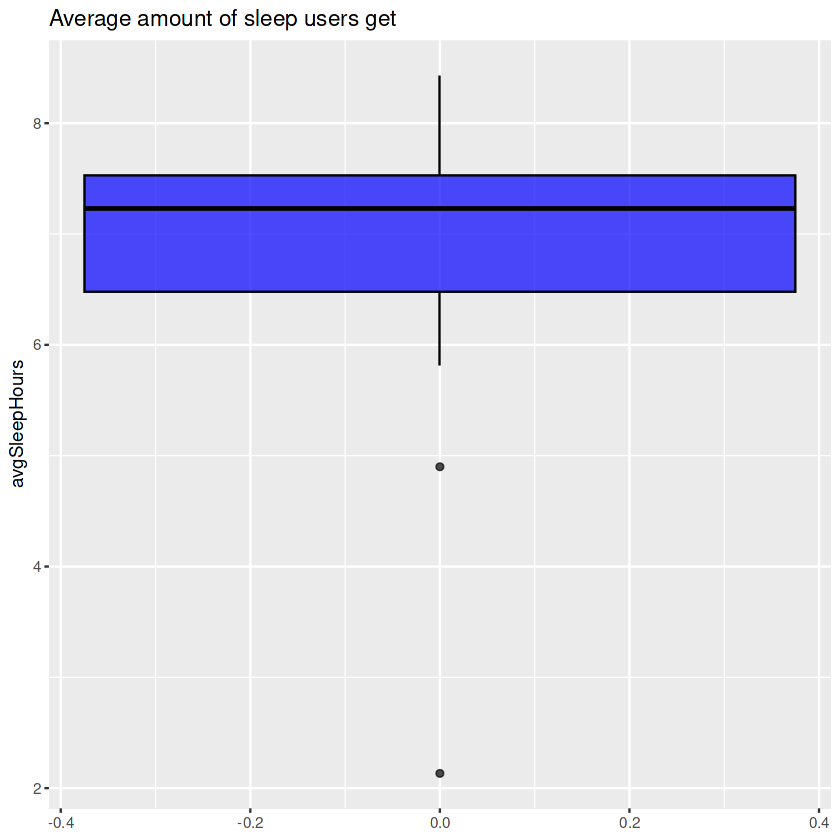

In [40]:
#Now let's plot how much users get on a box plot
ggplot(activityAndSleep, aes(y = avgSleepHours)) +
  geom_boxplot(fill = "blue", color = "black", alpha = 0.7) +
  ggtitle("Average amount of sleep users get")

We can see through the boxplot that users get good sleep in general, with almost all users getting between 6 to 8 hours of sleep. This result may be slightly skewed as the users who chose to use the sleep tracking function might be more attentive to their sleep health, and so have healthier sleep habits.

### 5.2.3 Are users taking too long to fall asleep

[1] 13

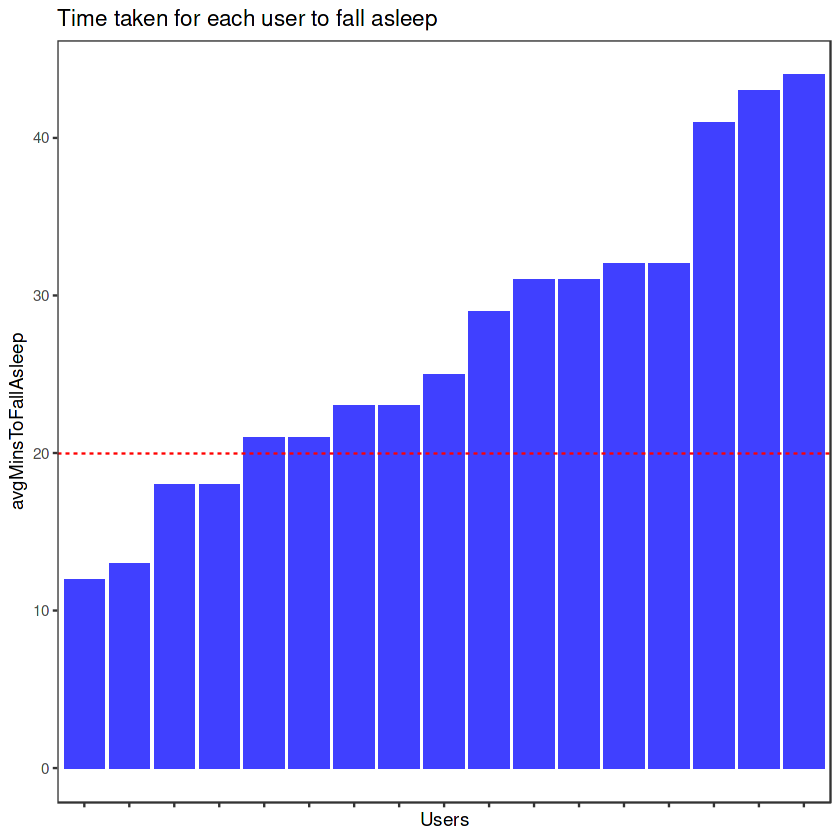

In [41]:
#Filtering out any potential outliers who take more than 1.5 hours to fall asleep
activityAndSleep <- filter(activityAndSleep, avgMinsToFallAsleep < 90)

activityAndSleep$Id <- factor(activityAndSleep$Id, levels = activityAndSleep$Id[order(activityAndSleep$avgMinsToFallAsleep)])

ggplot(activityAndSleep, aes(x = Id, y=avgMinsToFallAsleep, fill = Id)) +
  scale_y_continuous(breaks= pretty_breaks())+
  geom_bar(stat="identity", fill = "blue", alpha = 0.75) +
  geom_hline(yintercept = 20, color = "red", linetype = "dashed")+
  theme_bw()+
  theme(panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
        axis.text.x = element_blank())+
  labs(title = "Time taken for each user to fall asleep", x = "Users")

sum(activityAndSleep$avgMinsToFallAsleep > 20)


11/14 users take longer than 20 mins to fall asleep (12/15 if you count the outlier).


Medical research suggests that people should fall asleep within 20 minutes, and anything more than that could be a symptom of insomnia.


Medical research also suggests that taking longer than 20 minutes to fall asleep follows a trend where an increasing number of people are suffering from insomnia in the modern age.
This could be due to a multitude of reasons including: 
* The use of smart devices which exposes users to blue light
* Lack of excercise (however, we know from our earlier chart that our users are getting enough exercise)
* Increased stress from work and modern life
* City lifestyle with bright lights and noises


Knowing this, Bellabeat could implement features on the app such as giving a notification 1 hour before bed time, a reminder to turn on night light features on the phone, or perhaps even offer content through their app, such as meditation instructional videos, or articles with tips on how to fall asleep faster.


Additionally, Bellabeat could add a new tracking feature that calculates the time it takes users to fall asleep, in a similar process to the analysis done above, which would let users know if they are having trouble falling asleep.


Link:
https://www.mountsinai.org/health-library/diseases-conditions/insomnia-overview#:~:text=Poor%20sleeping%20environment%2C%20such%20as,Not%20getting%20enough%20exercise



### 5.2.3.1 Is there a correlation between activity minutes and time take to fall asleep
Research suggests that physical activity has a positive effect on sleep. We can look at the data to see if this correlation is true for the users in the dataset.

In [42]:
#Seeing if avg activity minutes has a correlation with amount of time take to fall asleep, and amount of time asleep
activityAndSleep <- merge(sleepCountAndAvg, userAvgWeekMins, by = "Id")
activityAndSleep

Id,avgSleepHours,avgHoursInBed,avgMinsToFallAsleep,sleepLogCount,AvgMinsPerWeek
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1503960366,6.000000,6.383333,23,25,438.33333
1927972279,6.950000,7.300000,21,5,18.66667
2026352035,8.433333,8.966667,32,28,0.00000
2347167796,7.450000,8.183333,44,15,150.50000
3977333714,4.900000,7.683333,167,28,582.33333
4020332650,5.816667,6.333333,31,8,50.00000
4319703577,7.950000,8.366667,25,26,136.00000
4388161847,6.666667,7.050000,23,23,398.66667
4445114986,6.416667,6.950000,32,28,67.66667


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


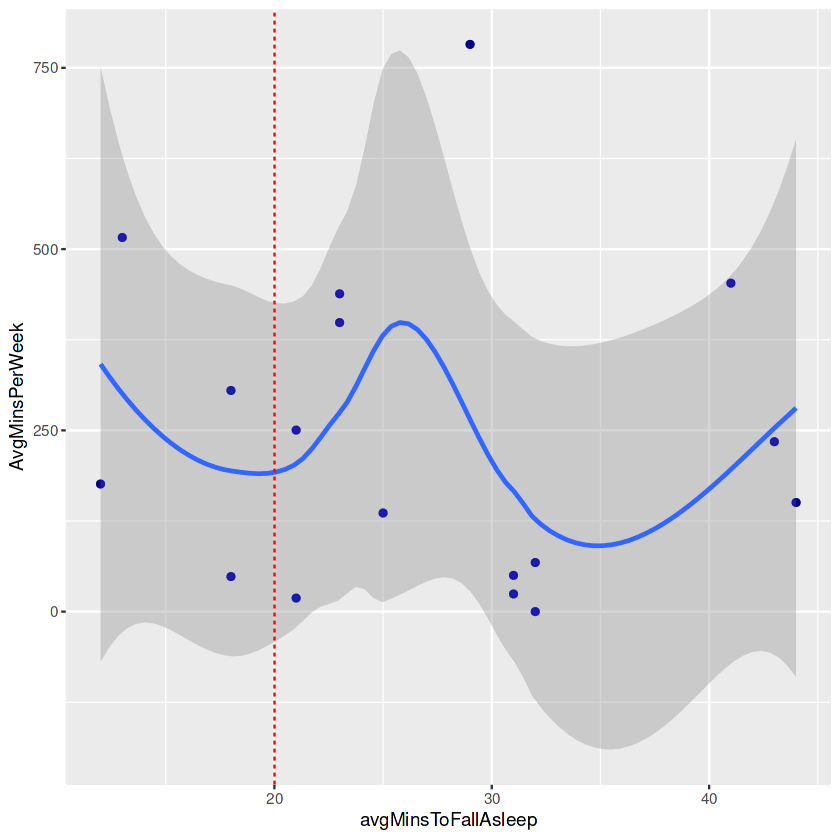

In [43]:
filter(activityAndSleep, avgMinsToFallAsleep < 120) %>% ggplot(aes(x=avgMinsToFallAsleep, y=AvgMinsPerWeek)) + geom_point() + geom_smooth()+
geom_vline(xintercept = 20, linetype = "dashed", color = "red")+
  geom_point(alpha = 0.5, color = "blue")

In the data, we see that there is no correlation between physical activity and time take to fall asleep.

## 6. Conclusion to analysis (Act)
Here, the key findings of the analysis will be summarised, and in addition, potential actions in reaction to these findings.

**Usage behaviour:**
1. Most users wear their device consistently
 * However, users tend to wear their devices less on weekdays, and more on weekends, particularly Friday
 * Potential reasons are that users tend to do more exercise on weekends, or more pertinently, that Fitbit devices do not fit the formal setting of the office, or that users deem it unfashionable
 * Recommendation:
 1. Market Bellabeat wearables as fashionable devices, that do not look out of place, but still give you the data you need

 
2. Significant number of users do not use the sleep tracking function
 * Through K-means clustering, we identify that users largely fall into 2 types - they either use the function regularly, or they do not use it at all
 * Potential reasons are that users might not value the function, find the wearing the device at night intrusive, or do not think it is accurate
 * Recommendations:
 1. Ascertain why users do not use the sleep tracking often, and derive recommendations from there
 
 
3. Significant number of users do not use the weight tracking function
 * Could be due to users finding it a hassle to link their device, or do not wish to buy a proprietary scale


**Health metrics:**
1. Significant number of users do not get enough moderate-intensity activity minutes each week
 * Could be due to not exercising vigorously enough
 * Recommendation:
   1. Implement a feature that detects activity, and gives a heads-up notification if it is not vigorous enough


2. Most users get enough sleep each night


3. Significant number of users take too long to fall asleep each night
 * Could be due to modern lifestyles
 * No correlation between exercise and time taken to fall asleep
 * Recommendations:
  1. Allow users to set a bed time, and give a reminder 1-2 hours in advance to allow users to prepare for sleep
  2. Introduce a feature that tracks time taken to fall asleep, and notifies users if there is a pattern of taking too long to sleep
  3. Provide in-app content such as meditation videos, or articles with tips on how to fall asleep faster

### 6.1 Survey

Above all else, the first thing Bellabeat should do is to attempt to verify and to add onto this analysis, through a survey, that would:

1. Verify the findings above through an additional survey, either to existing Bellabeat users, or general wearable device wearing population, sampled in a manner that is representative of Bellabeat's target demographics.
2. Also through the survey, add on to verifying the findings by finding causes for certain observed trends (e.g. why sleep tracking is not used often)
3. Through those causes, an additional round of actionable recommendations for product/marketing strategy can be made

### 6.2 Key findings

**Usage behaviour:**
1. Most users wear their device consistently
 * However, users tend to wear their devices less on weekdays, and more on weekends, particularly Friday
 * Potential reasons are that users tend to do more exercise on weekends, or more pertinently, that Fitbit devices do not fit the formal setting of the office, or that users deem it unfashionable
 * Recommendation:
 1. Market Bellabeat wearables as fashionable devices, that do not look out of place, but still give you the data you need

 
2. Significant number of users do not use the sleep tracking function
 * Through K-means clustering, we identify that users largely fall into 2 types - they either use the function regularly, or they do not use it at all
 * Potential reasons are that users might not value the function, find the wearing the device at night intrusive, or do not think it is accurate
 * Recommendations:
 1. Ascertain why users do not use the sleep tracking often, and derive recommendations from there
 
 
3. Significant number of users do not use the weight tracking function
 * Could be due to users finding it a hassle to link their device, or do not wish to buy a proprietary scale


**Health metrics:**
1. Significant number of users do not get enough moderate-intensity activity minutes each week
 * Could be due to not exercising vigorously enough
 * Recommendation:
   1. Implement a feature that detects activity, and gives a heads-up notification if it is not vigorous enough


2. Most users get enough sleep each night


3. Significant number of users take too long to fall asleep each night
 * Could be due to modern lifestyles
 * No correlation between exercise and time taken to fall asleep
 * Recommendations:
  1. Allow users to set a bed time, and give a reminder 1-2 hours in advance to allow users to prepare for sleep
  2. Introduce a feature that tracks time taken to fall asleep, and notifies users if there is a pattern of taking too long to sleep
  3. Provide in-app content such as meditation videos, or articles with tips on how to fall asleep faster